In [1]:
from chebGreen.greenlearning.model import *
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1 
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
model = GreenNN()
model.build(loadPath = "savedModels/laplace")

Using tensorflow 2.9.0
Metal device set to: Apple M1 Pro


In [3]:
%%time
g = Chebfun2(model.evaluateG, domain = [0, 1, 0, 1], prefs = Chebpy2Preferences(), simplify = False)

CPU times: user 511 ms, sys: 116 ms, total: 627 ms
Wall time: 506 ms


In [4]:
g

chebfun2 object
     domain       rank               corner values
[0,1] x [0,1]     38       [-0.005 -0.001 -0.001 -0.005]
vertical scale = 0.243904

In [5]:
%%time
u,s,v = g.svd(truncate = np.floor(33*2/np.pi).astype(int))

CPU times: user 651 ms, sys: 1.02 s, total: 1.67 s
Wall time: 191 ms


1.1577245206608866


(0.0, 1.0)

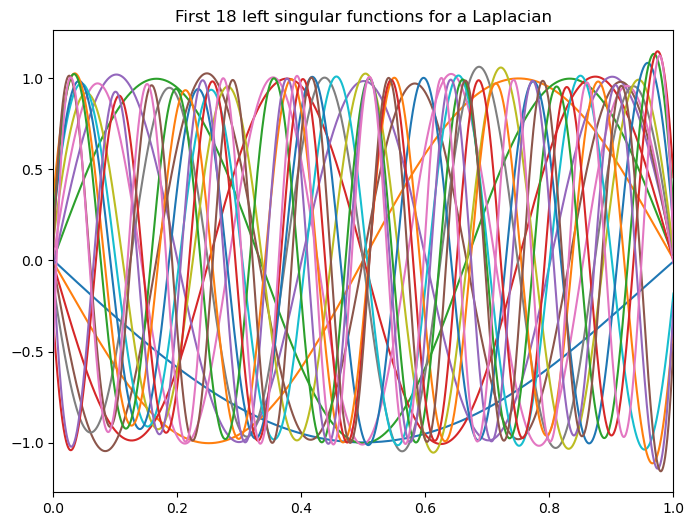

In [6]:
i = 17
fig = plt.figure(figsize = (8,6))
u[:,:i].plot()
print(np.max(u[:,:i].vscale))
plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [7]:
xx = np.linspace(0,1,2000)
yy = np.linspace(0,1,2000)
x, y = np.meshgrid(xx,yy)

CPU times: user 1.9 s, sys: 592 ms, total: 2.49 s
Wall time: 2.97 s


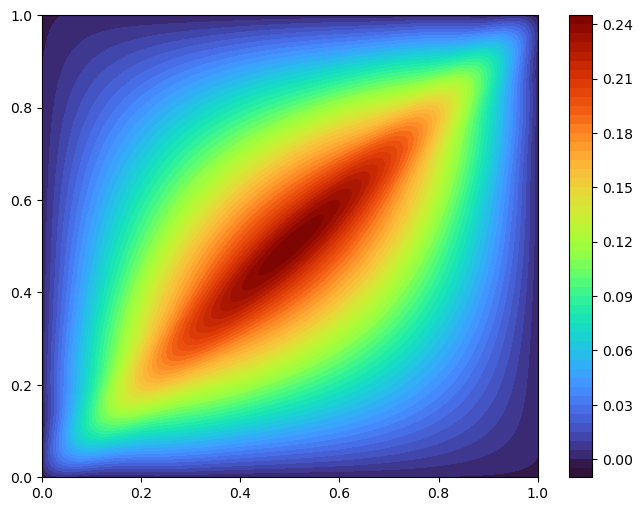

In [8]:
%%time
Gneural = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning.png', dpi = fig.dpi)

CPU times: user 2.23 s, sys: 1.84 s, total: 4.08 s
Wall time: 1.48 s


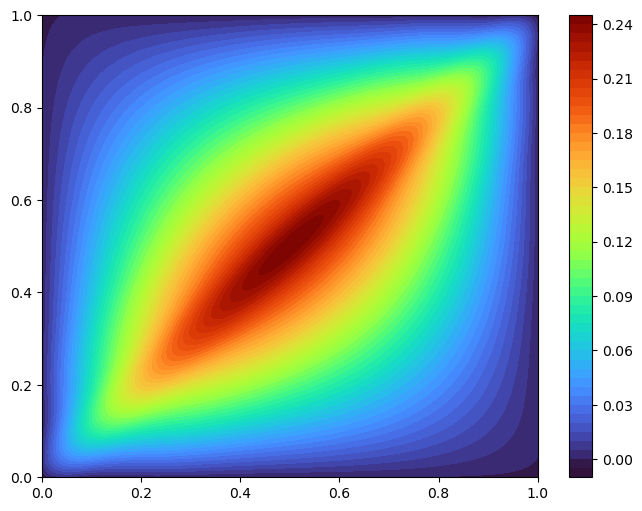

In [9]:
%%time
G = g[x,y]
fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning_chebfun2.png', dpi = fig.dpi)